In [30]:
%run functions.ipynb

messages = pd.read_csv('data/messages.csv', parse_dates= ['timestamp'])
employees = pd.read_csv('data/employees.csv')
messages.drop_duplicates(inplace = True)
sns.set_palette("RdBu")
sns.set_style('whitegrid')

messages = pd.merge(messages,employees,left_on='sender', right_on='id')
messages.rename(columns = {'department' : 'sender_dpt', 'location' : 'sender_loc', 'age' : 'sender_age'}, inplace = True)
messages = pd.merge(messages,employees,left_on='receiver', right_on='id')
messages.rename(columns = {'department' : 'receiver_dpt', 'location' : 'receiver_loc', 'age' : 'receiver_age'}, inplace = True)

messages_8_to_11 = messages[messages['timestamp'].dt.month >= 8]

We have the figure of the variation of received messages by the time analyzed.

As we can see, on the first two months we have much more messages send, specially from France and US locations and Sales, Operations and Admin departments. Also, employyes on age range 30 to 40 sended most part of the messages. the recent trend is better calculated considering the months 8 to 11. We can also note the no messages were sent from Brasil after month 7, let's see how the messages were received on the period the data was collected:

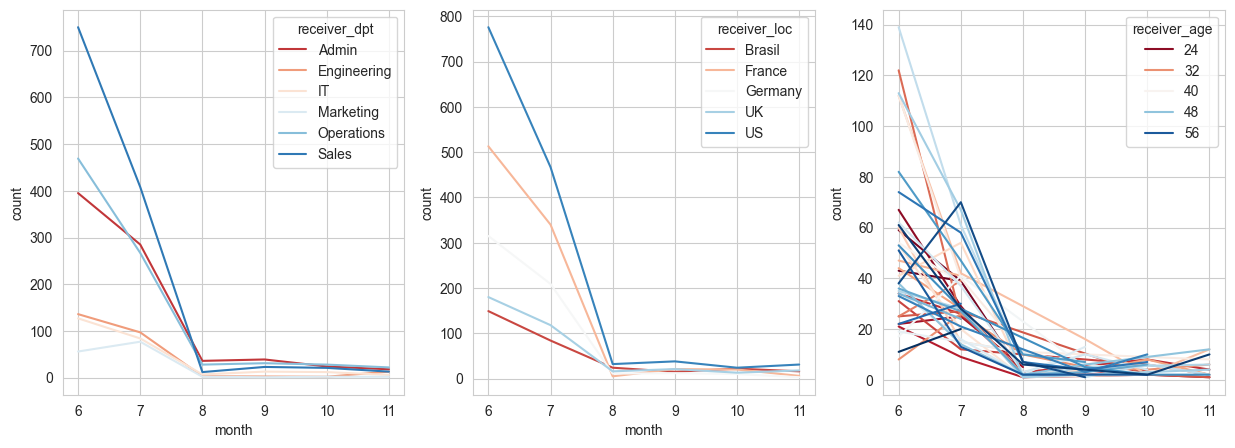

In [4]:
plot_through_time('receiver_dpt', 'receiver_loc', 'receiver_age')

Let's take a look on the activities of the employees on each month. In this first analysis, we want to get a hint from where the employee most influential must be. The networks above showed the strongest connections and below we can see that the employees from the countries least connected also stopped sending messages along the period analyzed, on the period analyzed we have basically messages sent from Us an France(most of the dots are red and orange specially if we look to the last four months), so the most influential employee most be from one of these countries.

About June/21 he had about 50% of the population already got vacined at the US, and about the same at the other countries, so the lower communication via messages may be result as the employees going back to the office, and some employees interacting more with other via ways like one-to-one talks. This seams a plausible answer, but if it's true, I would expect that the communication in the same country drops, but the communication between countries stays about the same, as these employees just communicate via messages. This is what we are going to check:  

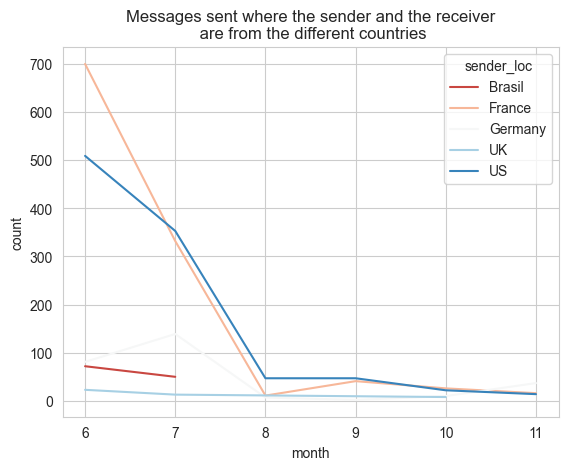

In [5]:
diff_countries()

The communication betwen different countries did not stayed stable, as expected if the only factor that explained the lower communication through time was due to the employees getting back to their offices, the communication in the same country would get lower but the communication between countries would stay about the same.

We can see the top connected employees if we consider only months 8 to 11, here we can check that employee 144 made over 70 connections in all the period, and he made 14 connections when considering only months 8 to 11, so he made about 56 different connections on the first two months.

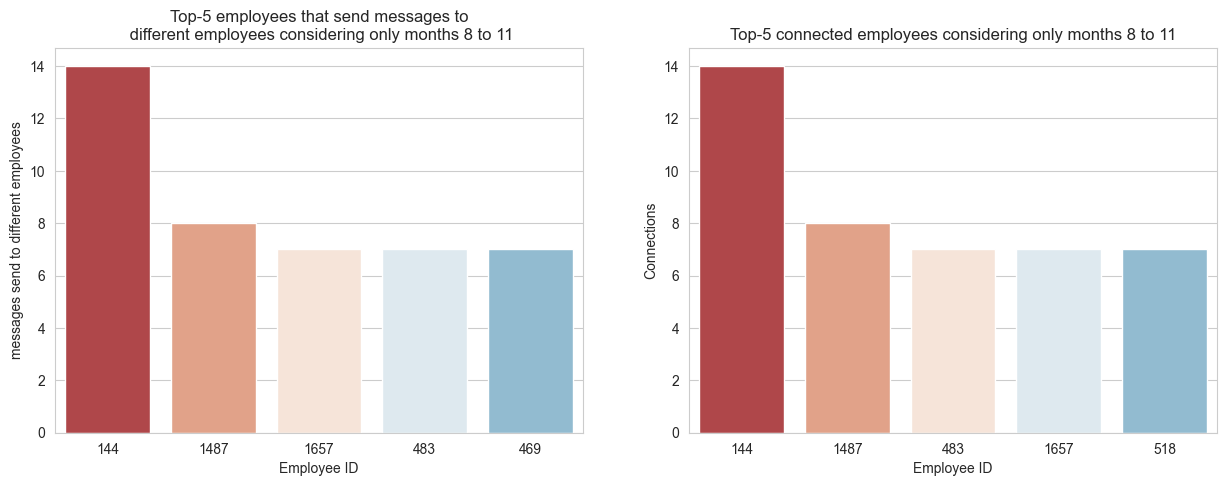

In [31]:
emp_interactions(messages_8_to_11, 'considering only months 8 to 11')

As we will see below, just a few employees send messages along all the months the data was collected. I moved the dots just a little bit horizoltaly so as we can see better and also differenced them by age and so we are able to see that employee's the activitiy is higher for younger or older employees:

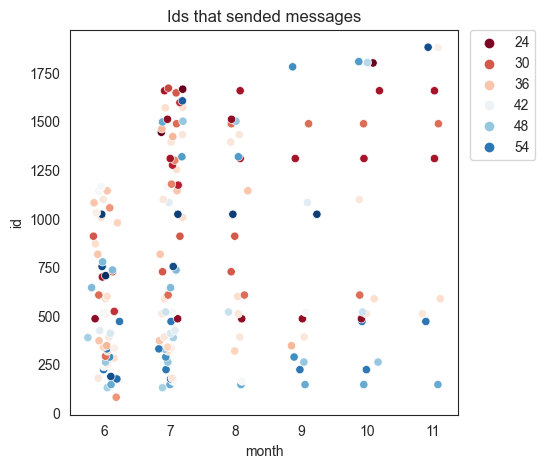

In [7]:
ploting_id_x_month('sender_age','age', 1.2)

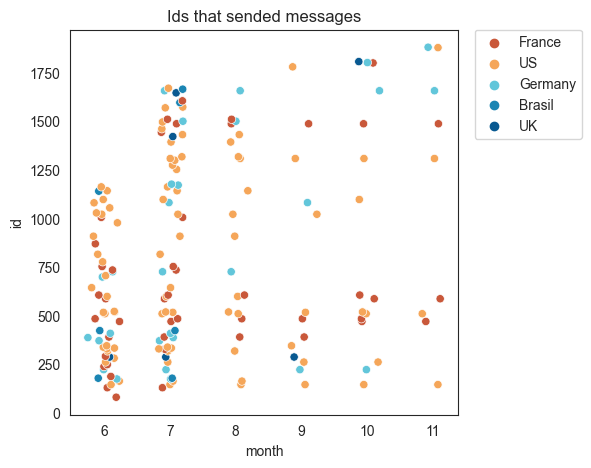

In [32]:
ploting_id_x_month('sender_loc', 'location', 1.32, sns.color_palette(colors_5))

And looking for the departments, we can expect the most influential employee be from  Sales, Operation or Admin. Since these are the departments which had more employees sending messages during the period, and there are more chance of being from Sales and Operations as seen on the graph below:

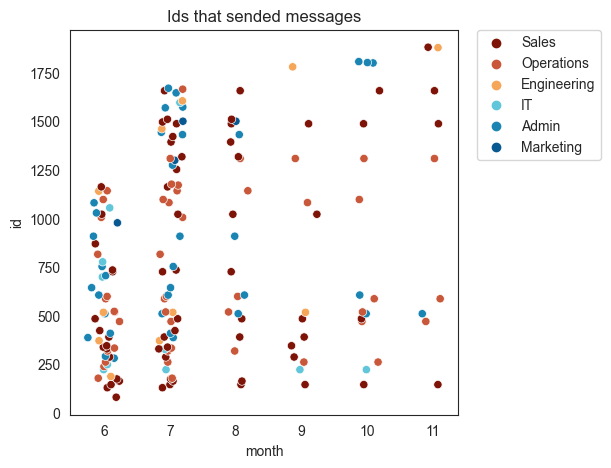

In [9]:
ploting_id_x_month('sender_dpt', 'department', 1.37, sns.color_palette(colors_6))

Okay, so we have that the number of employees that send messages decreased over the time analyzed. We yet know the the number of messages decreased too.

We can also have a look on how the network is distribuited among the countries the company is present.

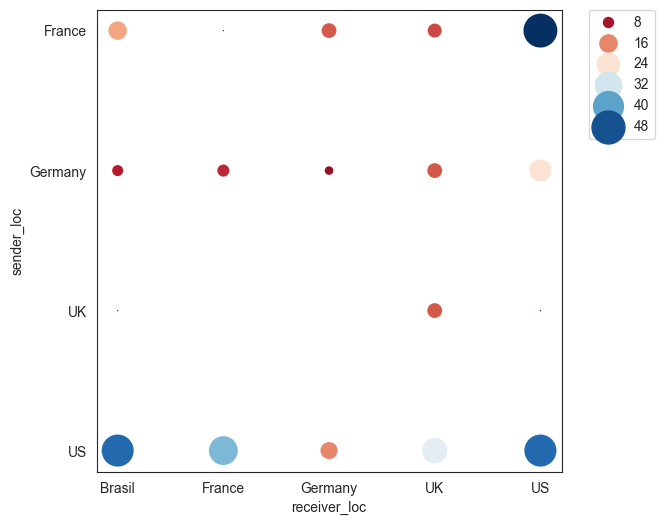

In [10]:
plot_interaction(messages_8_to_11, 'sender_loc', 'receiver_loc')

We can see that, on the last 4 months the data was collected, most of the messages were sent from US and the US is also the destination of most of the messages, we also have the France and Germany are the countries with most activity after US. The network can be represented as below:

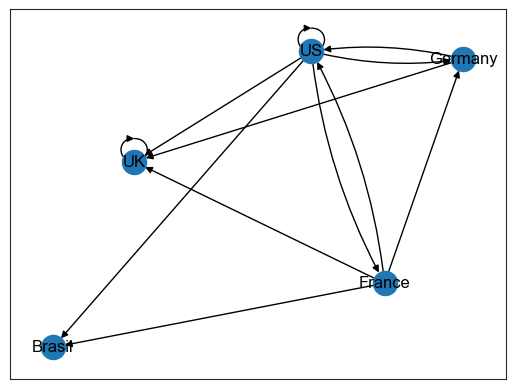

In [11]:
plot_network(messages_8_to_11,'sender_loc', 'receiver_loc', 10, 100)

We can checked how the sent messages were distribuited along the departments receiveing them:

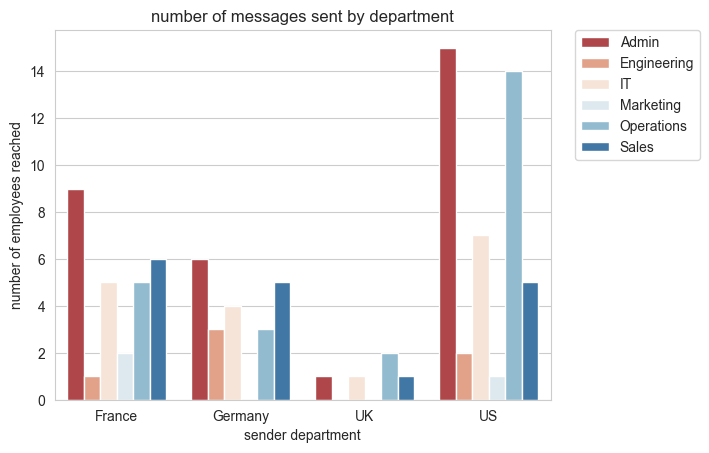

In [12]:
plot_dpt_to_emp(messages_8_to_11, ex = "sender_loc")

This analisys is for all the period the data was collected, but to compare with the last months, as we considered to the draw last network, we get the follow:

In [13]:
dpt_to_emp(messages_8_to_11)

    sender_dpt  number of employees reached
0        Admin                           14
1  Engineering                            5
2           IT                            3
3    Marketing                            3
4   Operations                           27
5        Sales                           46


And the employees reached was distribuited among the departments as it follows:

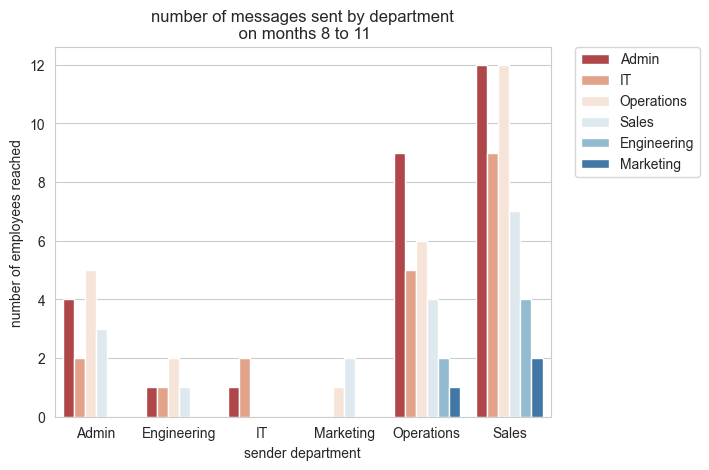

In [14]:
plot_dpt_to_emp(messages_8_to_11, string = "\n on months 8 to 11")

We can see how the employees interact each other:

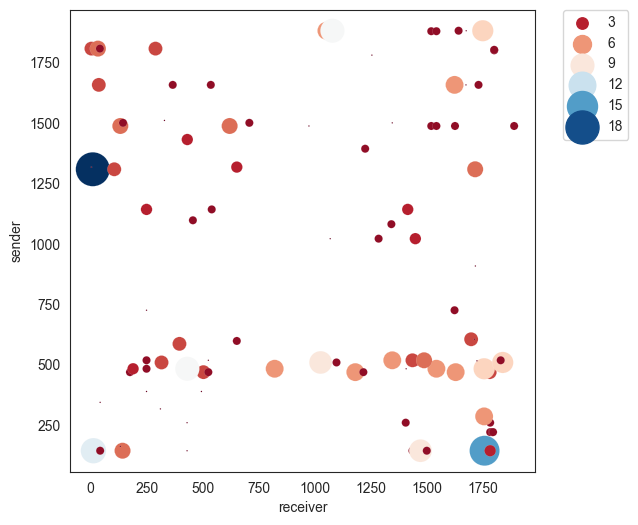

In [15]:
plot_interaction(messages_8_to_11, 'sender', 'receiver')

Okay, he have that he sent messages but most of his influence was on months 6 and 7. He still has some influence but it dropped a lot. Let's see just the recent activity, from months 8 to 11:




In [16]:
messages_sent(messages_8_to_11)

   sender id  number of messages sent
0        144                       58
1        483                       36
2       1308                       29
3       1881                       27
4        469                       26


Considering only months 8 to 11, we have that employee 144 sent more messages, we yet saw that he was the one that made more connections conisdering the ones who had activity on the lasts two months. We can have a look on these employees informations below:

In [17]:
employees[employees['id'].isin([144,605])]

,id,department,location,age
53,144,Sales,US,50
280,605,Admin,France,31


But as we saw in the activity of employee 144, he sended most of this messages on month 8 and just a few on months 9 to 11, so we will no consider him as the most influential, as we discussed in the main notebook.